In [1]:
%matplotlib inline
import scipy.io
import numpy as np
import matplotlib.pyplot as plt


# Support vector machines

In [2]:
data1 = scipy.io.loadmat('data/ex6data1')
x1 = data1['X']
y1 = data1['y']

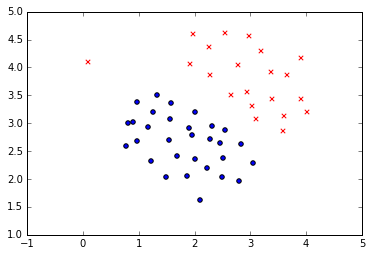

In [3]:
def plot_data(x,y):
    pos = np.array([x[i] for i in range(len(x)) if (y[i]==True)])
    neg = np.array([x[i] for i in range(len(x)) if (y[i]==False)])

    plt.scatter(pos[:,0],pos[:,1],marker='x',c='r')
    plt.hold(True)
    plt.scatter(neg[:,0],neg[:,1],marker='o',c='b')
    plt.show()

plot_data(x1,y1)

## 1.1. Make a linear SVM classfier and play with the parameters

In [4]:
from sklearn import svm
clf = svm.SVC(C=1, kernel='linear')
clf.fit(x1, y1.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

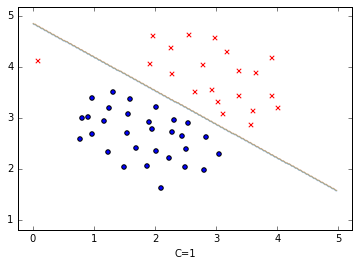

In [5]:
def plot_boundary(clf,xmin,xmax,ymin,ymax,text,x_source,y_source):
    x = np.arange(xmin,xmax,0.02)
    y = np.arange(ymin,ymax,0.02)
    xx,yy = np.meshgrid(x,y)
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contour(xx,yy,z, alpha=0.2,c='g')
    plt.xlabel(text)
    plot_data(x_source,y_source)
plot_boundary(clf,0,5,1,5,"C=1",x1,y1)

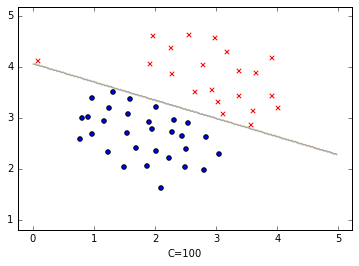

In [6]:
clf = svm.SVC(C=100, kernel='linear')
clf.fit(x1, y1.ravel())
plot_boundary(clf,0,5,1,5,"C=100",x1,y1)

## 1.2. Gaussian kernel on dataset 2

First define the Gaussian function

In [7]:
def gaussian_kernel(sigma,x1,x2):
    gamma = np.power(float(sigma),-2)*(1/2)
    right = (-(x1-x2)**2).sum()
    return np.exp(gamma*right)

In [8]:
# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# sim = gaussianKernel(x1, x2, sigma);
# this value should be about 0.324652
gaus1 = np.array([1, 2, 1])
gaus2 = np.array([0, 4, -1])
gaus_sigma = 2
print(gaussian_kernel(gaus_sigma,gaus1,gaus2))

0.324652467358


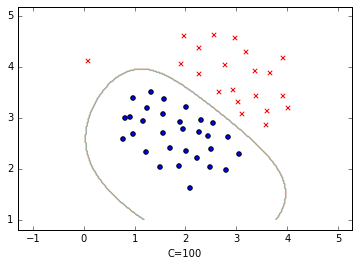

In [9]:
# RADIAL BASIS KERNEL == GAUSSIAN KERNEL 
clf = svm.SVC(C=100, kernel='rbf')
clf.fit(x1, y1.ravel())
plot_boundary(clf,-1,5,1,5,"C=100",x1,y1)

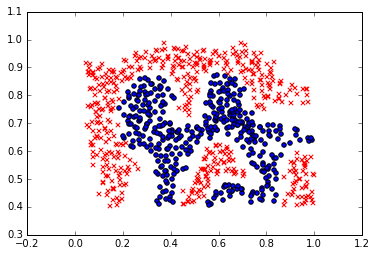

In [10]:
data2 = scipy.io.loadmat('data/ex6data2')
x2 = data2['X']
y2 = data2['y']
plot_data(x2,y2)

#### As you can see the data is completely non linearly separable, we thus must use the Gaussian kernel

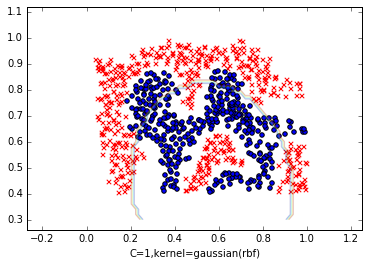

In [11]:
clf = svm.SVC(C=1,kernel='rbf')
clf = clf.fit(x2,y2.ravel())
plot_boundary(clf,-0.2,1.2,0.3,1.1,'C=1,kernel=gaussian(rbf)',x2,y2)

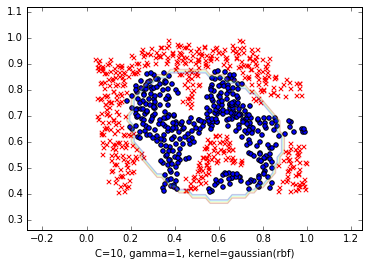

In [12]:
clf = svm.SVC(C=10,kernel='rbf',gamma=1)
clf = clf.fit(x2,y2.ravel())
plot_boundary(clf,-0.2,1.2,0.3,1.1,'C=10, gamma=1, kernel=gaussian(rbf)',x2,y2)

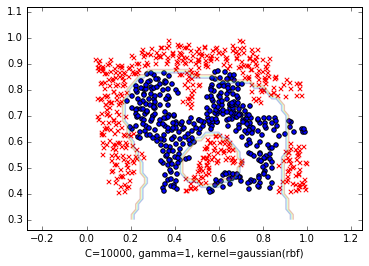

In [13]:
clf = svm.SVC(C=10000,kernel='rbf',gamma=1)
clf = clf.fit(x2,y2.ravel())
plot_boundary(clf,-0.2,1.2,0.3,1.1,'C=10000, gamma=1, kernel=gaussian(rbf)',x2,y2)

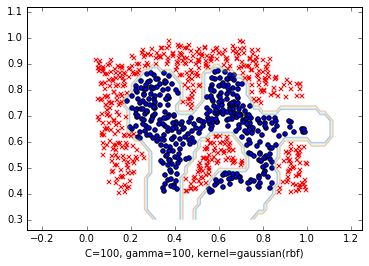

In [14]:
clf = svm.SVC(C=100,kernel='rbf',gamma=100)
clf = clf.fit(x2,y2.ravel())
plot_boundary(clf,-0.2,1.2,0.3,1.1,'C=100, gamma=100, kernel=gaussian(rbf)',x2,y2)

## 1.3. Cross validation (dataset 3)

In [15]:
data3 = scipy.io.loadmat('data/ex6data3')
x3 = data3['X']
y3 = data3['y']
yval = data3['yval']
xval = data3['Xval']

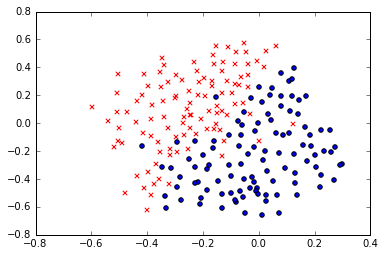

In [16]:
plot_data(x3,y3)

In [17]:
sigma = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma = np.power(sigma,-2)
C = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
best = [0,0,0,0]

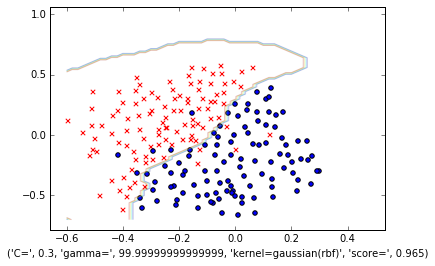

In [18]:
def find_best():
    for i in gamma:
        for j in C:
            gaus_svm = svm.SVC(kernel='rbf',gamma=i,C=j)
            gaus_svm.fit(x3,y3.flatten() )
            this_score = gaus_svm.score(xval,yval)
            if(this_score>best[1]):
                best[0] = gaus_svm
                best[1] = float(this_score)
                best[2] = float(i)
                best[3] = float(j)
    return best[0],best[1],best[2],best[3]

clf,best_score,best_gamma,best_c = find_best()

text = 'C=',best_c,'gamma=',best_gamma,'kernel=gaussian(rbf)','score=',best_score
plot_boundary(clf,-0.6,0.5,-0.7,1,text,x3,y3)

## 2.1. Email spam classification

In [66]:
import pandas as pd 
vocab = pd.DataFrame(pd.read_csv('data/vocab.txt',header = None,sep='\t',names=['id','word']))
ids = vocab.id.get_values()
words = vocab.word.get_values()
print(vocab.head())
dict = {}
dict2 = {}
for i in range(len(ids)):
    dict[words[i]] = ids[i]
    dict2[ids[i]] = words[i]
print(dict['about'])

   id   word
0   1     aa
1   2     ab
2   3   abil
3   4    abl
4   5  about
5


### 2.2 Loading the spam and non spam data

In [20]:
spam_train_data = scipy.io.loadmat('data/spamTrain')
x_train_data = spam_train_data['X']
y_train_data = spam_train_data['y']
spam_test_data = scipy.io.loadmat('data/spamTest')
x_test_data = spam_test_data['Xtest']
y_test_data = spam_test_data['ytest']
print("Training data")
print(x_train_data.shape)
print(y_train_data.shape)
print("Testing data")
print(x_test_data.shape)
print(y_test_data.shape)

Training data
(4000, 1899)
(4000, 1)
Testing data
(1000, 1899)
(1000, 1)


#### 2.3 For practice implementing a word cleaning utility

In [21]:
import re
import snowballstemmer
stemmer = snowballstemmer.stemmer('porter');

def process_email(text):
    text = text.lower()
    text = re.sub('\'','',text)
    text = re.sub('[0-9]+','number',text)
    text = re.sub('.+@\w+.\w+','emailaddr',text)
    text = re.sub('http://\w{3}.\w+.\w+/','httpaddr',text)
    text = re.sub('\$','dollar',text)
    text = re.sub('[^\w]',' ',text)
    text = re.sub(' +',' ',text)
    text = re.sub('^ ','',text)
    text_list = stemmer.stemWords(text.split(' '))
    j = ''
    for i in text_list:
        j+=i+' '
    text = j
    text = re.sub('  +','',text)
    return text

#### 2.4 Testing whether the output is equal to expected

In [22]:
spam_sample1 = open('data/emailSample1.txt','r').read()
processed_text = process_email(spam_sample1)
orig_string = 'anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr'

print(orig_string)
print()
print(processed_text)
print("\nOriginal string equal to processed?")
print(orig_string==processed_text)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Original string equal to processed?
True


#### 2.5 Transforming text into a vector (dictionary based)

In [28]:
words_index = []
for i in processed_text.split(' '):
    if(i in dict.keys()):
        words_index.append(dict[i])
        
print(words_index)

[86, 916, 794, 1077, 883, 370, 1699, 790, 1822, 1831, 883, 431, 1171, 794, 1002, 1895, 592, 1676, 238, 162, 89, 688, 945, 1663, 1120, 1062, 1699, 375, 1162, 479, 1893, 1510, 799, 1182, 1237, 810, 1895, 1440, 1547, 181, 1699, 1758, 1896, 688, 1676, 992, 961, 1477, 71, 530, 1699, 531]


#### 2.6 Filling up the final vector

In [24]:
final_vector=np.zeros(len(dict.keys()))
for i in words_index:
    final_vector[i] = 1
print(final_vector)

[ 0.  0.  0. ...,  1.  0.  0.]


#### 2.7 Make that a function

In [25]:
def transform_text_to_vector(text):
    text = process_email(text)
    words_index = []
    for i in text.split(' '):
        if(i in dict.keys()):
            words_index.append(dict[i])
    final_vector=np.zeros(len(dict.keys()))
    for i in words_index:
        final_vector[i] = 1
    return final_vector

In [31]:
tryout_vector = transform_text_to_vector(spam_sample1)
print(final_vector.ravel() == tryout_vector.ravel())
count = 0
for i in tryout_vector:
    if (i==True):
        count+=1
# andrew ng says 45 non-zero vectors, so this is a small mistake
print(count)

[ True  True  True ...,  True  True  True]
44


### 3. Building the spam classifier (using linear kernel)

In [55]:
spam_classifier = svm.SVC(kernel='linear')
spam_classifier.fit(x_train_data,y_train_data.ravel())
score = spam_classifier.score(x_test_data,y_test_data)
print(score)

0.978


#### 3.1 Checking the most spammy words

In [83]:
coeffs = spam_classifier.coef_[0]
import heapq
ks = heapq.nlargest(20, range(len(coeffs)), coeffs.take)
print("Top 20 words:\n")
for i in ks:
    print(dict2[i])


Top 20 words:

otherwis
flag
why
numberanumb
remot
visa
clearli
board
gt
seminar
technolog
institut
dollarac
titl
base
wife
ll
natur
page
believ


#### 3.2 Trying on our own mails
     - first two are spams
     - last two are not spams

In [109]:
spam_mail = open('data/spamSample1.txt').read()
spam_mail_vector =transform_text_to_vector(spam_mail)
print(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1))))
assert(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1)))==True)

True


In [110]:
spam_mail = open('data/spamSample2.txt').read()
spam_mail_vector =transform_text_to_vector(spam_mail)
print(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1))))
assert(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1)))==True)

True


In [111]:
spam_mail = open('data/emailSample1.txt').read()
spam_mail_vector =transform_text_to_vector(spam_mail)
print(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1))))
assert(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1)))==False)

False


In [112]:
spam_mail = open('data/emailSample2.txt').read()
spam_mail_vector =transform_text_to_vector(spam_mail)
print(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1))))
assert(bool(spam_classifier.predict(spam_mail_vector.reshape(1,-1)))==False)

False
